In [61]:
import pandas as pd
import numpy as np

In [62]:
%matplotlib inline

# Introduction to dataset

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Majorcode.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

# Data Processing

In [63]:
#Read dataset
recent_grads = pd.read_csv('recent-grads.csv')

In [64]:
recent_grads.head(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


In [65]:
#Check dataset
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [66]:
#Extract columns
columns = recent_grads.columns

In [67]:
#Initial analysis
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


# Missing Values

From recent_grads.info() we see there is one row with missing values

Action: drop rows with missing values.

Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors

In [68]:
#number of rows before removing missing values
raw_data_number = recent_grads['Rank'].count()

In [69]:
#Remove rows with missing values
recent_grads = recent_grads.dropna()

In [70]:
#Count rows in cleaned dataset
cleaned_data_count = recent_grads['Rank'].count()

In [71]:
print('Number of rows originally:',raw_data_number,
     '\nNumber of rows after cleaning:', cleaned_data_count)

Number of rows originally: 173 
Number of rows after cleaning: 172


# Exploratory Data Analysis (EDA)

We will use the df.plot() methods to plot different graphs.

Link to documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

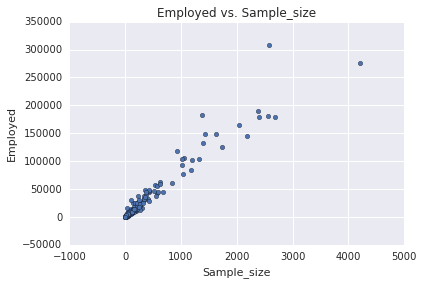

In [72]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', 
                  title='Employed vs. Sample_size', figsize=(6,4))

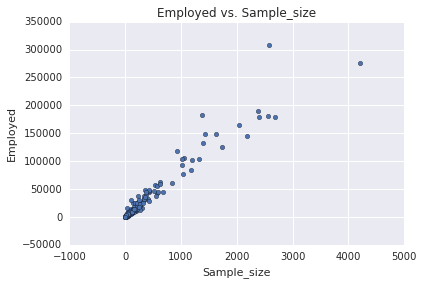

In [73]:
#Assigning the return value to a variable to access axis
ax = recent_grads.plot(x='Sample_size', y='Employed', 
                       kind='scatter')
ax.set_title('Employed vs. Sample_size')

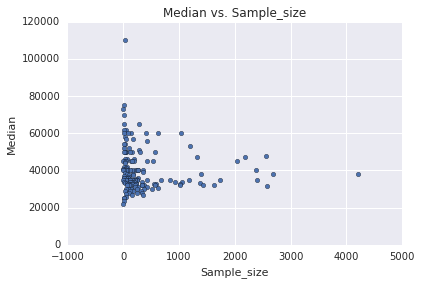

In [74]:
#Sample_size and Median
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', 
                  title='Median vs. Sample_size', figsize=(6,4))

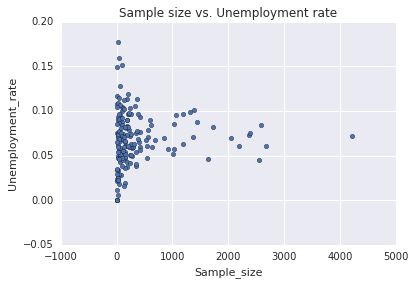

In [75]:
#Sample_size and Unemployment_rate
recent_grads.plot(x='Sample_size', y='Unemployment_rate', 
                  kind='scatter', 
                  title='Sample size vs. Unemployment rate', figsize=(6,4))

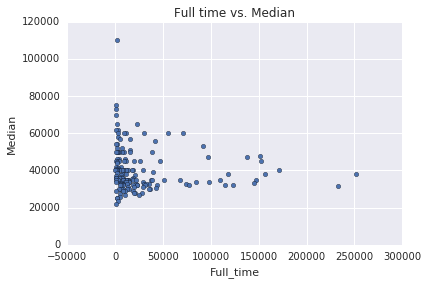

In [76]:
#Full_time and Median
recent_grads.plot(x='Full_time', y='Median', 
                  kind='scatter', 
                  title='Full time vs. Median', figsize=(6,4))

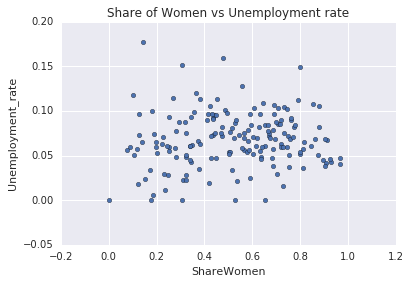

In [77]:
#ShareWomen and Unemployment_rate
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', 
                  kind='scatter', 
                  title='Share of Women vs Unemployment rate', 
                  figsize=(6,4))

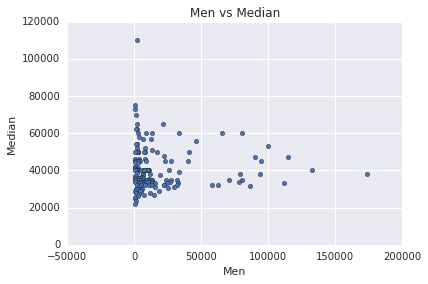

In [78]:
#Men and Median
recent_grads.plot(x='Men', y='Median', kind='scatter', 
                  title='Men vs Median', figsize=(6,4))

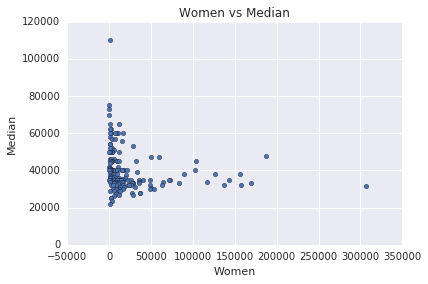

In [79]:
#Women and Median
recent_grads.plot(x='Women', y='Median', kind='scatter', 
                  title='Women vs Median', figsize=(6,4))

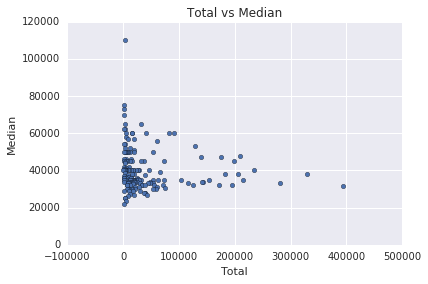

In [80]:
#Q: Do students in more popular majors make more money?
#A: based on graph, most common majors have lower median salary

recent_grads.plot(x='Total', y='Median', kind='scatter', 
                  title='Total vs Median', figsize=(6,4))

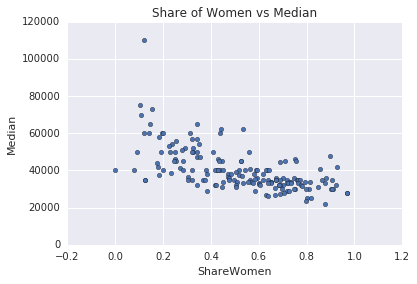

In [81]:
#Q: Do students that majored in subjects that were majority female make more money?
#A: There seems to be an inverse correlation between SOWomen and median salary

recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', 
                  title='Share of Women vs Median', figsize=(6,4))

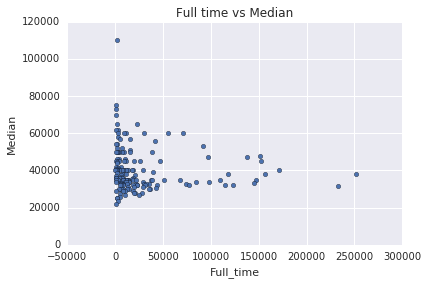

In [82]:
#Is there any link between the number of full-time employees and median salary?
#A: If any link, both variables are inversely correlated.

recent_grads.plot(x='Full_time', y='Median', kind='scatter', 
                  title='Full time vs Median', figsize=(6,4))

# Histograms of distributions

To explore the distribution of values in a column, we can select it from the DataFrame, call Series.plot(), and set the kind parameter to hist:

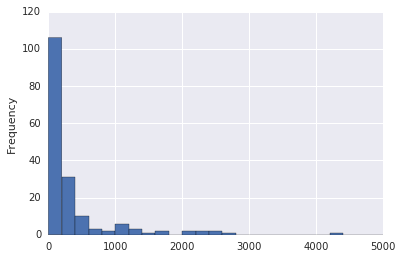

In [83]:
recent_grads['Sample_size'].plot(kind='hist', 
                                 bins=25, range=(0,5000))

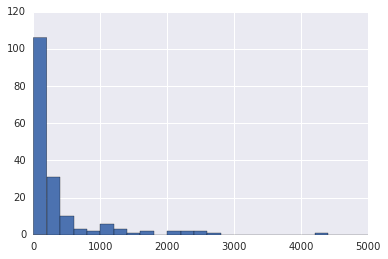

In [84]:
#Alternatively...
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

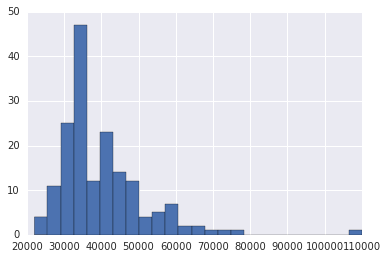

In [85]:
recent_grads['Median'].hist(bins=25)

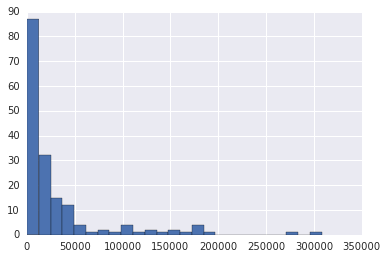

In [86]:
recent_grads['Employed'].hist(bins=25)

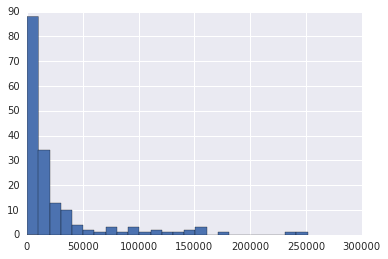

In [87]:
recent_grads['Full_time'].hist(bins=25)

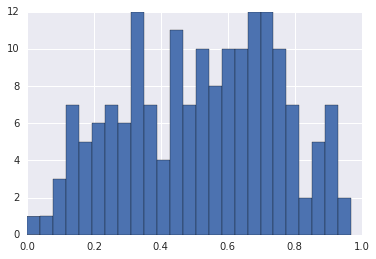

In [88]:
recent_grads['ShareWomen'].hist(bins=25)

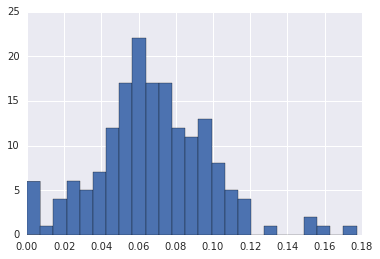

In [89]:
recent_grads['Unemployment_rate'].hist(bins=25)

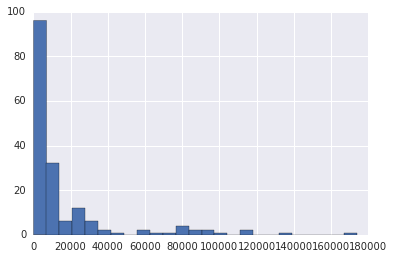

In [90]:
recent_grads['Men'].hist(bins=25)

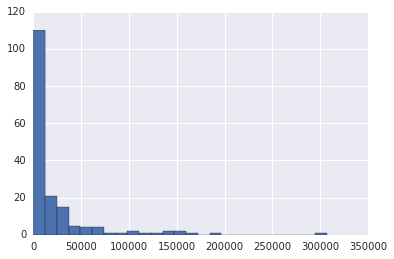

In [91]:
recent_grads['Women'].hist(bins=25)

# Scatter plotting 

In [92]:
import pandas.plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f773d31dcf8>,
      dtype=object)

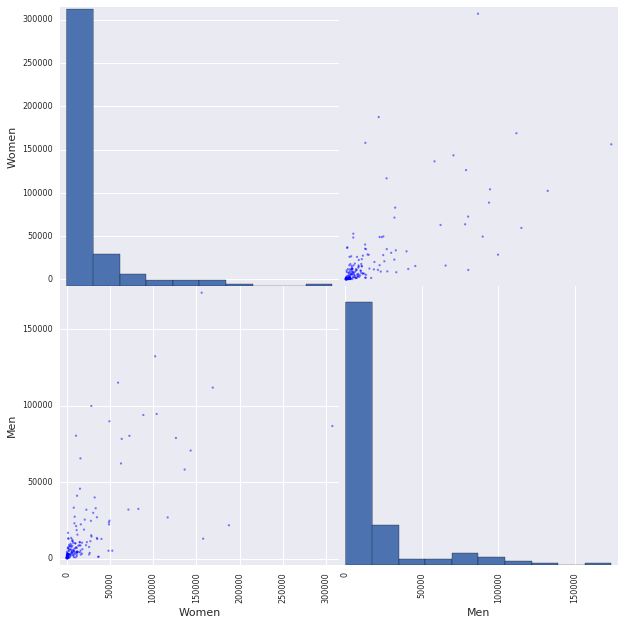

In [93]:
pandas.plotting.scatter_matrix(recent_grads[['Women', 'Men']], 
                               figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f773d1c9080>,
      dtype=object)

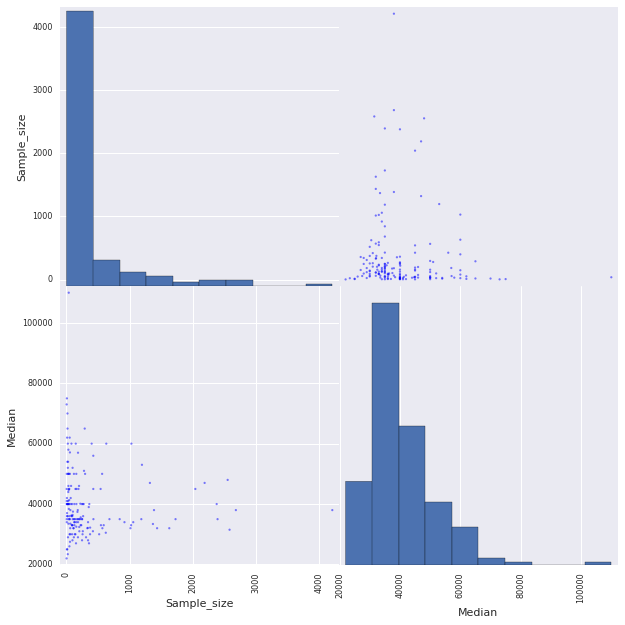

In [94]:
pandas.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median']], 
                               figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f773d154f98>,
      dtype=object)

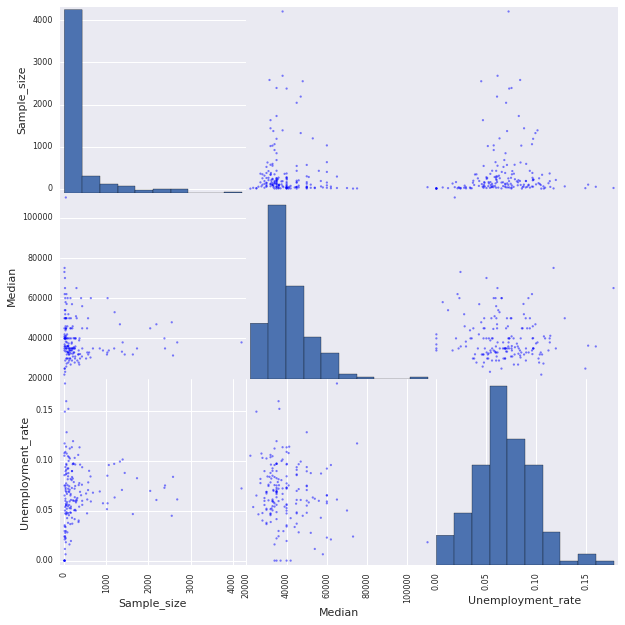

In [95]:
pandas.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], 
                               figsize=(10,10))

# Scatterplot matrix using Seaborn library

In [96]:
import seaborn as sns

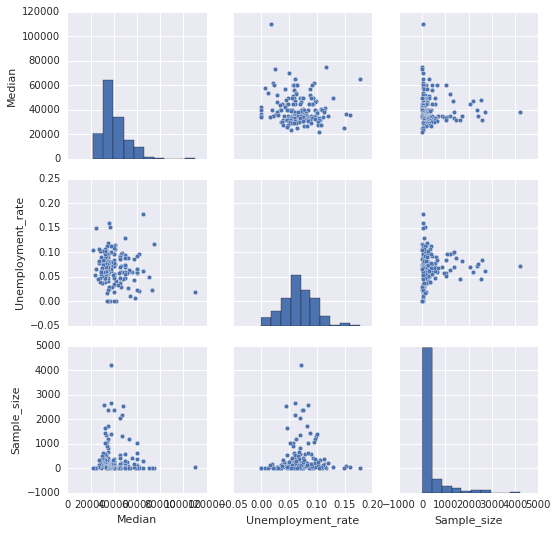

In [97]:
sns.pairplot(recent_grads[['Median','Unemployment_rate',
                           'Sample_size']])

# Bar plots

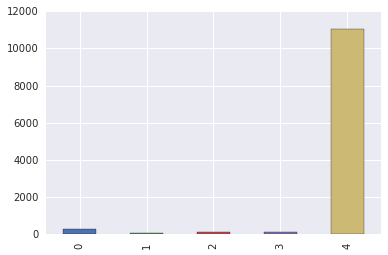

In [98]:
recent_grads[:5]['Women'].plot(kind='bar')

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the DataFrame.plot.bar() method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars

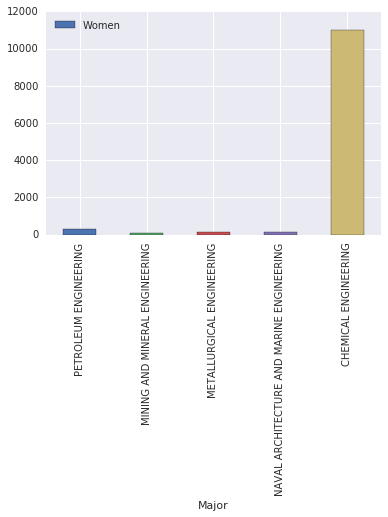

In [99]:
recent_grads[:5].plot.bar(x='Major', y='Women')

Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe

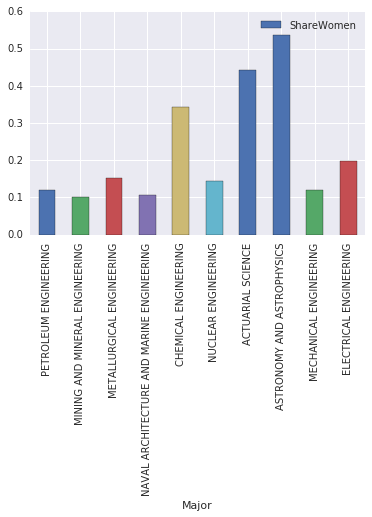

In [100]:
recent_grads[:10].plot.bar(x='Major',y='ShareWomen')

Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

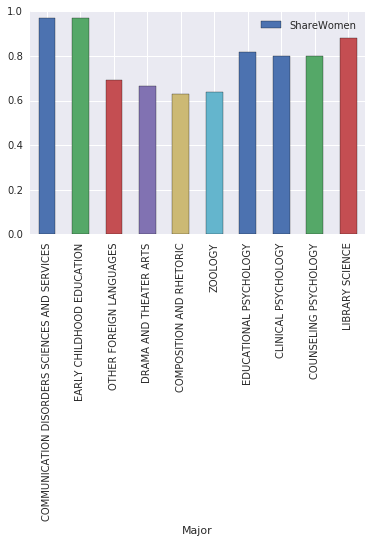

In [101]:
recent_grads[-10:].plot.bar(x='Major',y='ShareWomen')

In [102]:
df = recent_grads[['Major','ShareWomen']]

In [103]:
#top 5 major with highest Share of Women
df.sort_values('ShareWomen',ascending=False)[:5]

,Major,ShareWomen
164,EARLY CHILDHOOD EDUCATION,0.968954
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,0.967998
51,MEDICAL ASSISTING SERVICES,0.927807
138,ELEMENTARY EDUCATION,0.923745
150,FAMILY AND CONSUMER SCIENCES,0.910933


In [104]:
#Bottom 5 major with lowest Share of Women
df.sort_values('ShareWomen',ascending=False)[-5:]

,Major,ShareWomen
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.107313
1,MINING AND MINERAL ENGINEERING,0.101852
26,CONSTRUCTION SERVICES,0.090713
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,0.077453
73,MILITARY TECHNOLOGIES,0.000000


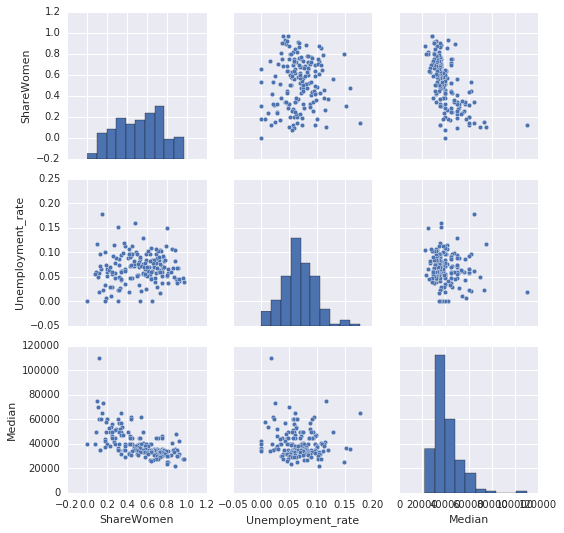

In [105]:
sns.pairplot(recent_grads[['ShareWomen','Unemployment_rate',
                           'Median']])

In [106]:
df_group_sum = recent_grads.groupby('Major_category').sum()

In [107]:
df_group_sum['ShareWomen'] = df_group_sum['Women']/df_group_sum['Total']

In [108]:
df_group_mean = recent_grads.groupby('Major_category').mean()

In [109]:
#Top Major categories with higher median salary
df_group_mean.sort_values('Median',ascending=False)[['Median']].head(5)

,Median
Major_category,
Engineering,57382.758621
Business,43538.461538
Computers & Mathematics,42745.454545
Law & Public Policy,42200.000000
Physical Sciences,41890.000000


In [110]:
#Top Major categories with higher Share of women
df_group_sum.sort_values('ShareWomen',ascending=False)[['ShareWomen']].head(5)

,ShareWomen
Major_category,
Health,0.836977
Education,0.814844
Psychology & Social Work,0.796022
Interdisciplinary,0.770901
Communications & Journalism,0.663982


In [111]:
#Relationship between share women and median salary on Category Major
df2 = df_group_sum[['ShareWomen']].join(df_group_mean[['Median']])

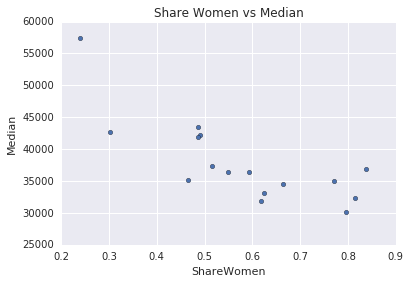

In [112]:
df2.plot(x='ShareWomen', y='Median', kind='scatter', 
                  title='Share Women vs Median', figsize=(6,4) )

In [113]:
#Reset index
df2['Category_major']=df2.index

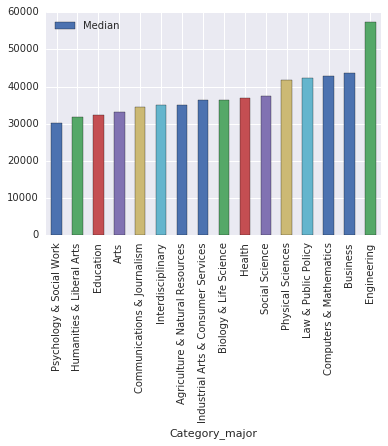

In [114]:
df2.sort_values('Median').plot.bar(x='Category_major', 
                                   y='Median')

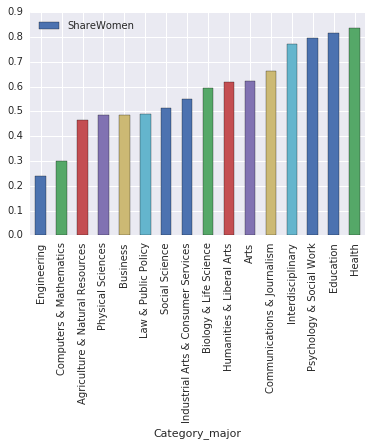

In [115]:
df2.sort_values('ShareWomen').plot.bar(x='Category_major', 
                                       y='ShareWomen')

Conclusion: the share of women in social sciences and education is subtantially higher than men; however those majors lead to comparably lower salaries. If we assume that students have chosen freely their major and that the marketplace is efficient, the difference in salaries between men and women can be attributed to their career of choice and not to their gender

# Additional analysis

Analysis of median salaries and unemployment rate

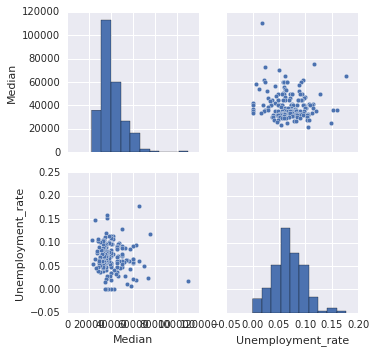

In [116]:
sns.pairplot(recent_grads[['Median','Unemployment_rate']])

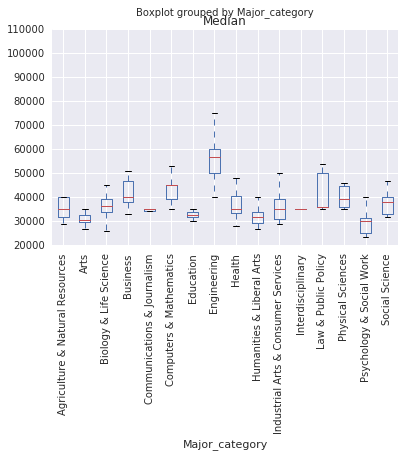

In [117]:
recent_grads.boxplot(column='Median', by='Major_category', 
                     rot=90)

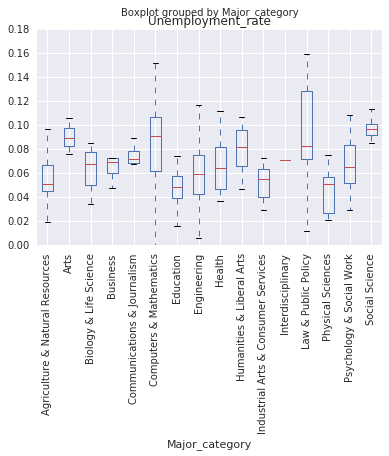

In [144]:
recent_grads.boxplot(column='Unemployment_rate', 
                     by='Major_category',rot=90)

In [ ]:
#Using Seaborn
#sns.boxplot(data=)

Analysis of number of men and women in each category of major

In [120]:
import matplotlib.pyplot as plt

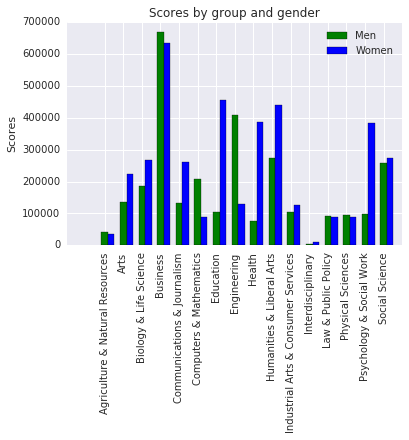

In [143]:
labels = df_group_sum.index
men_ttl = df_group_sum['Men']
women_ttl = df_group_sum['Women']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_ttl, width, label='Men',
               color='g')
rects2 = ax.bar(x + width/2, women_ttl, width, label='Women',
               color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()